# --- Modelado

## Cargamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from datetime import datetime,timedelta
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

## Vamos a leer nuestra base de datos

In [2]:
import io
import requests

In [3]:
url="https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv"
s=requests.get(url).content
datos_galicia=pd.read_csv(io.StringIO(s.decode('ISO-8859-1')))

In [4]:
datos_galicia.head()

,Unnamed: 0,id,superficie,fecha,lat,lng,idprovincia,idmunicipio,causa,muertos,...,TMIN,TMAX,VELMEDIA,RACHA,SOL,Trimestre,Mes,Año,DIR_VIENTO,PRES_RANGE
0,1,2001150021,5.0,2001-02-20,43.703581,-8.038777,A Coruña,CEDEIRA,negligencia,0,...,7.0,15.6,2-4 m/s,16.9,10.2,Q1,febrero,2001,E,4.4
1,3,2001150094,1.5,2001-02-25,43.186836,-8.685470,A Coruña,CARBALLO,intencionado,0,...,6.5,11.6,4-6 m/s,11.1,10.2,Q1,febrero,2001,NE,4.7
2,5,2001150145,1.5,2001-04-13,43.699889,-7.984566,A Coruña,CEDEIRA,negligencia,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
3,6,2001150151,1.1,2001-04-13,42.758649,-8.917814,A Coruña,LOUSAME,causa desconocida,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
4,7,2001150153,1.5,2001-04-13,43.063218,-9.235604,A Coruña,MUXÃÂA,intencionado,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2


Vamos a eliminar el id y la columna unnamed

In [5]:
datos_galicia = datos_galicia.drop(columns=["Unnamed: 0"])

In [6]:
datos_galicia = datos_galicia.drop(columns=["id"])

In [7]:
datos_galicia.describe()

,superficie,lat,lng,muertos,heridos,time_ctrl,time_ext,personal,medios,perdidas,TMEDIA,PRECIPITACION,TMIN,TMAX,RACHA,SOL,Año,PRES_RANGE
count,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000
mean,2.704065,42.587027,-8.078299,0.000118,0.001058,1.854042,1.854042,14.604186,2.373119,3469.805386,17.163735,0.122060,10.475494,23.852258,8.638723,9.003916,2006.473424,3.663688
std,1.938164,0.442282,0.550397,0.010844,0.032517,0.897890,0.897890,11.033939,1.864551,13203.797619,5.598738,0.327375,5.898333,6.717744,3.271247,3.361576,4.118239,1.616254
min,1.000000,41.831486,-9.292834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.300000,0.000000,-8.600000,5.600000,1.700000,0.000000,2001.000000,0.000000
25%,1.330000,42.222045,-8.542590,0.000000,0.000000,1.200000,1.200000,7.000000,1.000000,0.000000,13.200000,0.000000,6.400000,19.400000,6.400000,7.200000,2003.000000,2.400000
50%,2.000000,42.552107,-8.074289,0.000000,0.000000,1.540000,1.540000,12.000000,2.000000,1076.500000,17.900000,0.000000,11.600000,23.700000,8.100000,9.700000,2006.000000,3.400000
75%,3.450000,42.939743,-7.657787,0.000000,0.000000,2.380000,2.380000,19.000000,3.000000,3732.750000,21.225000,0.000000,15.200000,28.400000,10.800000,11.500000,2011.000000,4.700000
max,10.200000,43.730713,-6.734889,1.000000,1.000000,4.190000,4.190000,258.000000,8.000000,658803.000000,31.200000,1.000000,23.400000,41.800000,28.300000,14.800000,2015.000000,8.600000


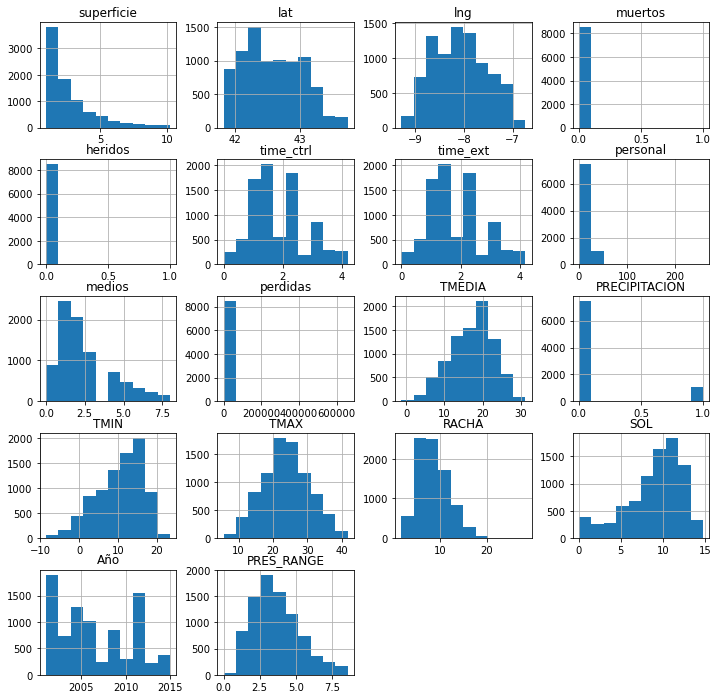

In [8]:
datos_galicia.hist(figsize = (12, 12));


In [9]:
datos_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

In [10]:
datos_galicia.shape

(8504, 28)

Vamos a ver si los tipos de datos han migrado bien desde R

In [11]:
datos_galicia.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
perdidas           int64
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

Vamos a cambiar el tipo de dato de fecha

In [12]:
datos_galicia.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
perdidas           int64
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

En primer lugar, creamos nuestras variables objetivo: las pérdidas como variable numérica y causas como variable categórica.

### Empezamos con la numérica -> Pérdidas

In [13]:
datos_galicia_num = datos_galicia.copy()

In [14]:
datos_galicia_num['target']=datos_galicia_num['perdidas']

In [15]:
datos_galicia_num.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE', 'target'],
      dtype='object')

In [16]:
datos_galicia_num = datos_galicia_num.drop(columns=['perdidas'])

Eliminamos nuestra otra variable objetivo

In [17]:
datos_galicia_num = datos_galicia_num.drop(columns=['causa'])

In [18]:
datos_galicia_num.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal', 'medios',
       'gastos', 'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'TMAX',
       'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año', 'DIR_VIENTO',
       'PRES_RANGE', 'target'],
      dtype='object')

In [19]:
datos_galicia_num.shape

(8504, 27)

Finalmente, tenemos un dataset de 8504 filas y 28 columnas

Comprobamos que no haya NAs

In [20]:
datos_galicia_num.isnull().sum()

superficie       0
fecha            0
lat              0
lng              0
idprovincia      0
idmunicipio      0
muertos          0
heridos          0
time_ctrl        0
time_ext         0
personal         0
medios           0
gastos           0
ALTITUD          0
TMEDIA           0
PRECIPITACION    0
TMIN             0
TMAX             0
VELMEDIA         0
RACHA            0
SOL              0
Trimestre        0
Mes              0
Año              0
DIR_VIENTO       0
PRES_RANGE       0
target           0
dtype: int64

Ahora, vamos a separar las variables categóricas de las numéricas

In [21]:
lista_numericas=datos_galicia_num._get_numeric_data()
lista_categoricas=datos_galicia_num.select_dtypes(include = ["object"])

Comprobamos

In [22]:
len(lista_categoricas.columns)

9

In [23]:
len(lista_numericas.columns)

18

ha incluido correctamente todas las columnas. Vemos que incluye cada lista

In [24]:
lista_categoricas.columns

Index(['fecha', 'idprovincia', 'idmunicipio', 'gastos', 'ALTITUD', 'VELMEDIA',
       'Trimestre', 'Mes', 'DIR_VIENTO'],
      dtype='object')

In [25]:
lista_numericas.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target'],
      dtype='object')

Vamos a ver como se distribuyen los valores en las variables categoricas

In [26]:
for i in lista_categoricas:
    print(datos_galicia_num[i].value_counts())

2002-09-02    42
2001-09-18    42
2006-08-09    37
2006-08-06    33
2002-08-31    33
              ..
2011-09-11     1
2011-08-30     1
2007-01-07     1
2008-04-14     1
2002-02-14     1
Name: fecha, Length: 1970, dtype: int64
Ourense       2983
A Coruña      2415
Pontevedra    2029
Lugo          1077
Name: idprovincia, dtype: int64
VIANA DO BOLO           216
SANTA COMBA             170
MANZANEDA               164
RODEIRO                 147
MUIÃâOS              128
                       ... 
RIBEIRA DE PIQUÃÂN      1
CORCUBIÃâN             1
BEADE                     1
CARIÃâO                1
BARREIROS                 1
Name: idmunicipio, Length: 268, dtype: int64
NO INFO     6331
1K-10K      1436
< 1K         541
10K-100K     192
> 100K         4
Name: gastos, dtype: int64
Superior a 125    2983
Inferior a 80     2415
Entre 100-125     2029
NO INFO           1077
Name: ALTITUD, dtype: int64
< 2 m/s    4719
2-4 m/s    2619
4-6 m/s     816
6-8 m/s     248
> 8 m/s     102


Eliminamos idmunicipio porque son demasiadas categorias

In [27]:
datos_galicia_num = datos_galicia_num.drop(columns=['idmunicipio'])

In [28]:
datos_galicia_num.shape

(8504, 26)

## Transformamos las variables categóricas -> codificación one-hot

Este método consiste en crear una nueva variable binaria por cada categoria existente en la variable inicial, donde 
1 serán las observaciones que pertenezcan a esa categoría y 0 las demás.

En muchas tareas, tales como la regresión lineal, es común usar k-1 variables binarias en lugar de k, donde k es el número total de categorías. Esto se debe a que estamos añadiendo una variable extra redundante que no es más que una combinación lineal de las otras y seguramente afectará de manera negativa al rendimiento del modelo. Además, al eliminar una variable no estamos perdiendo información, ya que se entiende que, si el resto de las categorías contienen un 0, la categoría correspondiente es la de la variable eliminada.

In [29]:
dummies= pd.get_dummies(datos_galicia_num['idprovincia'], drop_first = True)
dummies.head()

,Lugo,Ourense,Pontevedra
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [30]:
datos_galicia_num = pd.concat([datos_galicia_num, dummies], axis = 1)

Tenemos que tener tres variables mas

In [31]:
datos_galicia_num.shape

(8504, 29)

In [32]:
datos_galicia_num.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'muertos',
       'heridos', 'time_ctrl', 'time_ext', 'personal', 'medios', 'gastos',
       'ALTITUD', 'TMEDIA', 'PRECIPITACION', 'TMIN', 'TMAX', 'VELMEDIA',
       'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año', 'DIR_VIENTO', 'PRES_RANGE',
       'target', 'Lugo', 'Ourense', 'Pontevedra'],
      dtype='object')

Eliminamos idprovincia

In [33]:
datos_galicia_num = datos_galicia_num.drop(columns=['idprovincia'])

In [34]:
datos_galicia_num.shape

(8504, 28)

Lo hacemos con el resto de variables categoricas

In [35]:
dummies2= pd.get_dummies(datos_galicia_num['gastos'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies2], axis = 1)
dummies3= pd.get_dummies(datos_galicia_num['ALTITUD'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies3], axis = 1)
dummies4= pd.get_dummies(datos_galicia_num['Trimestre'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies4], axis = 1)
dummies5= pd.get_dummies(datos_galicia_num['DIR_VIENTO'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies5], axis = 1)
dummies6= pd.get_dummies(datos_galicia_num['VELMEDIA'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies6], axis = 1)
dummies7= pd.get_dummies(datos_galicia_num['Mes'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_num, dummies7], axis = 1)

Ahora eliminamos las variables originales

In [36]:
datos_galicia_num = datos_galicia_num.drop(columns=['gastos'])
datos_galicia_num = datos_galicia_num.drop(columns=['ALTITUD'])
datos_galicia_num = datos_galicia_num.drop(columns=['Trimestre'])
datos_galicia_num = datos_galicia_num.drop(columns=['DIR_VIENTO'])
datos_galicia_num = datos_galicia_num.drop(columns=['VELMEDIA'])
datos_galicia_num = datos_galicia_num.drop(columns=['Mes'])

In [37]:
datos_galicia_num.shape

(8504, 54)

In [38]:
datos_galicia_num.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target', 'Lugo',
       'Ourense', 'Pontevedra', '1K-10K', '< 1K ', '> 100K', 'NO INFO',
       'Inferior a 80', 'NO INFO', 'Superior a 125', 'Q2', 'Q3', 'Q4', 'N',
       'NE', 'NW', 'S', 'SE', 'SW', 'W', '4-6 m/s', '6-8 m/s', '< 2 m/s',
       '> 8 m/s', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio',
       'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre'],
      dtype='object')

# Modelado

Dividimos los datos en Train y Test y separamos ambas entre x -> entradas ( variables explicativas) e y-> salidas ( variable objetivo)
Nuestro conjunto de Train es el entrenamiento, en Test probaremos los resultados de nuestras predicciones.


In [39]:
datos_galicia_num['fecha'] = pd.to_datetime(datos_galicia_num['fecha'])

In [40]:
datos_galicia_num =  datos_galicia_num.drop('fecha', axis = 'columns')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia_num.drop('target', axis = 'columns'),
                                        datos_galicia_num['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

Comprobamos las dimensiones de Train y Test

In [42]:
X_train.shape

(6803, 52)

In [43]:
y_train.shape

(6803,)

In [44]:
X_test.shape

(1701, 52)

In [45]:
y_test.shape

(1701,)

Normalizamos

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)

In [48]:
norm= tf.keras.layers.experimental.preprocessing.Normalization(axis = -1,dtype=None,mean = None,variance=None)

norm.adapt(X_train)
x_train_norm = norm(X_train)

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Primero vamos a generar varios tipos de modelos con todas las variables para ver cuál puede ser el modelo que más se ajuste a nuestros datos

#### Regresión lineal múltiple

Los algoritmos son utilizados para aprender a predecir el valor de una variable continua a partir de una o más variables explicativas.

In [50]:
from sklearn import linear_model

In [51]:
X_train.shape

(6803, 52)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model.score(X_test,y_test)

0.07730286718911694

In [54]:
model.score(X_test,y_test)

0.07730286718911694

In [55]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [  629.17505   2076.1257     -53.37378    937.15955  -2946.4424
   208.29243    208.35991     38.04918    255.48752  -4366.5303
   373.76053   2296.5068    2198.8564      62.64453     42.167847
   -87.91608     52.97815    273.55862    292.45404   1381.6725
 -1274.4667   -1598.966    -1924.5657     772.9381   -1947.6954
   273.56342    292.44012    302.16626   -955.1858      70.21704
  -456.17627    403.3607    -213.48694    633.52515   -205.45422
  -124.09633    287.6644    1162.3754    -290.5116      29.888916
 -1532.0332    -330.83276    507.55115   -916.5858     -96.94763
  -409.51917    242.71887   1596.3733    -674.11127    542.9192
  -980.26337   -214.83508 ]


In [56]:
y_pred = model.predict(X_test)

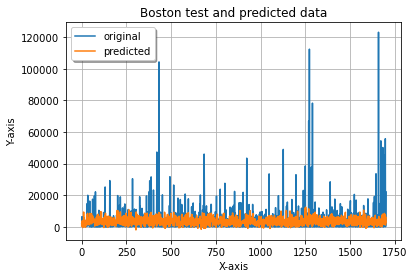

In [57]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

### Arbol de decisión

En el caso de regresión, en lugar de usar Gini como medida de impureza, usamos MSE, el error cuadrático medio. Para este problema,
si usamos un árbol de decisión de profundidad 2, obtenemos el siguiente árbol.

In [58]:
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
score = modelo_arbol.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9986415006592424


In [60]:
modelo_arbol.score(X_train,y_train)

0.9986415006592424

In [61]:
modelo_arbol.score(X_test,y_test)

-1.1610494201973784

In [62]:
y_pred        = modelo_arbol.predict(X_test)

Representamos nuestro error

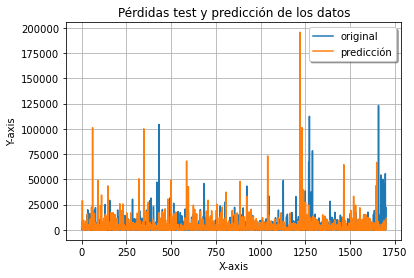

In [63]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicción")
plt.title("Pérdidas test y predicción de los datos")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [65]:
modelo_randfor = RandomForestRegressor().fit(X_train, y_train)
y_pred        = modelo_randfor.predict(X_test)

In [66]:
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3570.92 degrees.


In [67]:
modelo_randfor.score(X_train,y_train)

0.8388858678006386

In [68]:
modelo_randfor.score(X_test,y_test)

-0.12135081986574202

### Naive Bayes

Obtiene la probabilidad considerando las variables predictoras independientes, como si actuasen cada una de manera individual frente a la variable objetivo

In [69]:
modelo_bayes = naive_bayes.GaussianNB().fit(X_train, y_train)
y_pred        = modelo_bayes.predict(X_test)

In [70]:
print(modelo_bayes.score(X_train, y_train))

0.5497574599441423


In [71]:
print(modelo_bayes.score(X_test, y_test))

0.004703115814226925


### Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
model_Gboost = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model_Gboost.score(X_train, y_train)

model.score(X_test, y_test)

0.07730286718911694

### Continuamos con la categórica -> Causa

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pickle

Creamos un dataset igual que el incial

In [74]:
datos_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

In [75]:
datos_galicia.shape

(8504, 28)

In [76]:
datos_galicia_cat = datos_galicia.copy()

In [77]:
datos_galicia_cat.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
perdidas           int64
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

In [78]:
datos_galicia_cat.shape

(8504, 28)

In [79]:
datos_galicia_cat['target']=datos_galicia_cat['causa']

In [80]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['causa'])

Vemos como se distrubuye la variabe categórica

In [81]:
print(datos_galicia_cat.groupby('target').size())

target
causa desconocida     667
fuego reproducido     157
intencionado         7158
negligencia           441
rayo                   81
dtype: int64


Separamos categóricas de numéricas

In [82]:
lista_numericas=datos_galicia_cat._get_numeric_data()
lista_categoricas=datos_galicia_cat.select_dtypes(include = ["object"])

In [83]:
lista_numericas.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'perdidas', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE'],
      dtype='object')

In [84]:
lista_categoricas.columns

Index(['fecha', 'idprovincia', 'idmunicipio', 'gastos', 'ALTITUD', 'VELMEDIA',
       'Trimestre', 'Mes', 'DIR_VIENTO', 'target'],
      dtype='object')

Eliminamos idmunicipio por exceso de categorias

## Transformamos las variables categóricas -> One-Hot

Primero vemos las categorías que componen a cada una de ellas

In [85]:
for i in lista_categoricas:
    print(datos_galicia_cat[i].value_counts())

2002-09-02    42
2001-09-18    42
2006-08-09    37
2006-08-06    33
2002-08-31    33
              ..
2011-09-11     1
2011-08-30     1
2007-01-07     1
2008-04-14     1
2002-02-14     1
Name: fecha, Length: 1970, dtype: int64
Ourense       2983
A Coruña      2415
Pontevedra    2029
Lugo          1077
Name: idprovincia, dtype: int64
VIANA DO BOLO           216
SANTA COMBA             170
MANZANEDA               164
RODEIRO                 147
MUIÃâOS              128
                       ... 
RIBEIRA DE PIQUÃÂN      1
CORCUBIÃâN             1
BEADE                     1
CARIÃâO                1
BARREIROS                 1
Name: idmunicipio, Length: 268, dtype: int64
NO INFO     6331
1K-10K      1436
< 1K         541
10K-100K     192
> 100K         4
Name: gastos, dtype: int64
Superior a 125    2983
Inferior a 80     2415
Entre 100-125     2029
NO INFO           1077
Name: ALTITUD, dtype: int64
< 2 m/s    4719
2-4 m/s    2619
4-6 m/s     816
6-8 m/s     248
> 8 m/s     102


In [86]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['fecha'])

In [87]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['idmunicipio'])

In [88]:
datos_galicia_cat['gastos'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NO INFO
1       NO INFO
2       NO INFO
3       NO INFO
4       NO INFO
         ...   
8499     1K-10K
8500     1K-10K
8501     1K-10K
8502     1K-10K
8503     1K-10K
Name: gastos, Length: 8504, dtype: object>

In [89]:
dummies= pd.get_dummies(datos_galicia_cat['idprovincia'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies], axis = 1)
dummies2= pd.get_dummies(datos_galicia_cat['gastos'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies2], axis = 1)
dummies3= pd.get_dummies(datos_galicia_cat['ALTITUD'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies3], axis = 1)
dummies4= pd.get_dummies(datos_galicia_cat['Trimestre'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies4], axis = 1)
dummies5= pd.get_dummies(datos_galicia_cat['DIR_VIENTO'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies5], axis = 1)
dummies6= pd.get_dummies(datos_galicia_cat['VELMEDIA'], drop_first = True)
datos_galicia_cat = pd.concat([datos_galicia_cat, dummies6], axis = 1)
dummies7= pd.get_dummies(datos_galicia_cat['Mes'], drop_first = True)
datos_galicia_num = pd.concat([datos_galicia_cat, dummies7], axis = 1)

In [90]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['idprovincia'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['gastos'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['ALTITUD'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['Trimestre'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['DIR_VIENTO'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['VELMEDIA'])
datos_galicia_cat = datos_galicia_cat.drop(columns=['Mes'])

In [91]:
datos_galicia_cat.dtypes

superficie        float64
lat               float64
lng               float64
muertos             int64
heridos             int64
time_ctrl         float64
time_ext          float64
personal            int64
medios              int64
perdidas            int64
TMEDIA            float64
PRECIPITACION       int64
TMIN              float64
TMAX              float64
RACHA             float64
SOL               float64
Año                 int64
PRES_RANGE        float64
target             object
Lugo                uint8
Ourense             uint8
Pontevedra          uint8
1K-10K              uint8
< 1K                uint8
> 100K              uint8
NO INFO             uint8
Inferior a 80       uint8
NO INFO             uint8
Superior a 125      uint8
Q2                  uint8
Q3                  uint8
Q4                  uint8
N                   uint8
NE                  uint8
NW                  uint8
S                   uint8
SE                  uint8
SW                  uint8
W           

In [92]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia_cat.drop('target', axis = 'columns'),
                                        datos_galicia_cat['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [94]:
datos_galicia_cat.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'perdidas', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target', 'Lugo',
       'Ourense', 'Pontevedra', '1K-10K', '< 1K ', '> 100K', 'NO INFO',
       'Inferior a 80', 'NO INFO', 'Superior a 125', 'Q2', 'Q3', 'Q4', 'N',
       'NE', 'NW', 'S', 'SE', 'SW', 'W', '4-6 m/s', '6-8 m/s', '< 2 m/s',
       '> 8 m/s'],
      dtype='object')

In [95]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1


Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "c:\users\davif\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(r

  Using cached scikit_learn-0.24.1-cp38-cp38-win_amd64.whl (6.9 MB)


In [96]:
!pip3 install "scikit_learn==0.22.2.post1"

  Using cached scikit_learn-0.22.2.post1-cp38-cp38-win_amd64.whl (6.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [97]:
import sklearn

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = datos_galicia_cat['target']
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

from scipy import sparse
y_sparse = sparse.csr_matrix(y_dense)


[[0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [100]:
classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)

In [101]:
classifier.score(X_test, y_test)

0.8395061728395061

In [102]:
classifier.score(X_train, y_train)

1.0

In [103]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [105]:
cm

array([[   0,    0,  132,    0,    0],
       [   0,    0,   34,    0,    0],
       [   1,    0, 1424,    0,    0],
       [   1,    0,   89,    0,    0],
       [   0,    0,   20,    0,    0]], dtype=int64)

In [106]:
dtree_model.score(X_train, y_train)

0.8433044245185948

In [109]:
dtree_model.score(X_test, y_test)

0.8371546149323927

In [107]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.7354497354497355


In [110]:
accuracy2 = gnb.score(X_train, y_train)
print(accuracy2)

0.7379097457004263


In [108]:
cm

array([[   0,    8,  106,    3,   15],
       [   0,    8,   24,    0,    2],
       [   1,   98, 1230,    5,   91],
       [   0,    4,   83,    2,    1],
       [   0,    0,    9,    0,   11]], dtype=int64)